# Preprocess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

### Loading Cifar Dataset

170498071/170498071 [==============================] - 6s 0us/step
Loaded Cifer Dataset

Sample :


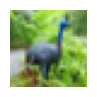


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Loaded Cifer Dataset")
print("")
print("Sample :")

plt.figure(figsize=(1,1))  # Adjust the size as needed
plt.imshow(x_train[6])
plt.axis('off')  # Remove the axis
plt.show()
print("")
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN

In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Flatten, Dense, add
import tensorflow as tf

In [6]:
def convolutional_block(x,n):
   x1 = Conv2D(n, (2,2), strides=(1,1), padding='same',activation='relu')(x)
   x2 = Conv2D(n, (3,3), strides=(2,2), padding='same',activation='relu')(x1)
  # x3 = Conv2D(n, (2,2), strides=(1,1), padding='same',activation='relu')(x2)
   #x4 = Conv2D(n, (3,3), strides=(2,2), padding='same',activation='relu')(x3)

   return x2

## CNN softmax+categorical

In [7]:
model = Sequential()
input_shape=(32,32,3)
img_input = Input(input_shape)

x = Conv2D(128,(2,2),  strides=(1,1), padding='same', activation='relu')(img_input)
b1 = convolutional_block(x, 128)
m1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b1)
b2 = convolutional_block(m1, 64)
m2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b2)
b3 = convolutional_block(m2, 32)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model_cnn1 = Model(img_input, output)
model_cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

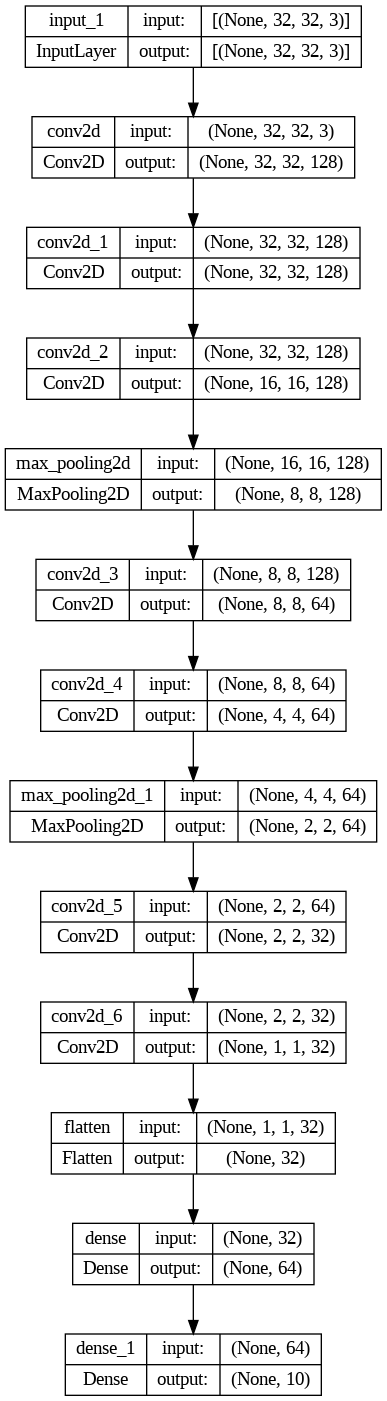

In [8]:
from keras.utils import plot_model
plot_model(model_cnn1, show_shapes=True)

In [9]:
model_cnn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       65664     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 128)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          32832     
                                                             

In [10]:
# x_train = np.reshape(x_train, [-1, 32*32*3])
# x_train = x_train.astype('float32') / 255
# x_test = np.reshape(x_test, [-1, 32*32*3])
# x_test = x_test.astype('float32') / 255

In [11]:
model_cnn1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 27s 13ms/step - loss: 1.7238 - accuracy: 0.3493 - val_loss: 1.4623 - val_accuracy: 0.4544
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2738 - accuracy: 0.5348 - val_loss: 1.2162 - val_accuracy: 0.5628
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0952 - accuracy: 0.6048 - val_loss: 1.0914 - val_accuracy: 0.6101
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9883 - accuracy: 0.6416 - val_loss: 1.0379 - val_accuracy: 0.6232
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9205 - accuracy: 0.6683 - val_loss: 1.0677 - val_accuracy: 0.6210
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8620 - accuracy: 0.6889 - val_loss: 0.9525 - val_accuracy: 0.6666
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8173 - accuracy: 0.7044 - val_loss: 0.9752 -

In [12]:
test_loss, test_acc = model_cnn1.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9123 - accuracy: 0.6926 - 1s/epoch - 4ms/step

Test accuracy: 0.6926000118255615


In [14]:
model_cnn1.save('cnn1(Softmax+cate).h5')

## sigmoid+binary cross entropy

In [15]:
model = Sequential()
input_shape=(32,32,3)
img_input = Input(input_shape)

x = Conv2D(128,(2,2),  strides=(1,1), padding='same', activation='relu')(img_input)
b1 = convolutional_block(x, 128)
m1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b1)
b2 = convolutional_block(m1, 64)
m2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b2)
b3 = convolutional_block(m2, 32)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='sigmoid')(output)

model_cnn2 = Model(img_input, output)
model_cnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model_cnn2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       1664      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       65664     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          32832     
                                                           

In [17]:
model_cnn2.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 27s 15ms/step - loss: 0.2607 - accuracy: 0.3674 - val_loss: 0.2325 - val_accuracy: 0.4553
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.2045 - accuracy: 0.5278 - val_loss: 0.1919 - val_accuracy: 0.5626
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1802 - accuracy: 0.5955 - val_loss: 0.1776 - val_accuracy: 0.6030
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.1649 - accuracy: 0.6345 - val_loss: 0.1790 - val_accuracy: 0.5991
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.1532 - accuracy: 0.6638 - val_loss: 0.1586 - val_accuracy: 0.6526
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1450 - accuracy: 0.6841 - val_loss: 0.1567 - val_accuracy: 0.6651
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1366 - accuracy: 0.7056 - val_loss: 0.1492 -

In [18]:
test_loss, test_acc = model_cnn2.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1611 - accuracy: 0.6655 - 1s/epoch - 4ms/step

Test accuracy: 0.6654999852180481


In [19]:
model_cnn2.save('cnn1(sigmoid+bin).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CNN with skip connection

In [20]:
def create_block(x, n,s):
  x1 = Conv2D(n, (2,2), strides=(s,s), padding='same',activation='relu')(x)
  x2 = Conv2D(n, (3,3), strides=(1,1), padding='same',activation='relu')(x1)
  x3 = Conv2D(n, (2,2), strides=(1,1), padding='same',activation='relu')(x2)
  x4 = Conv2D(n, (3,3), strides=(1,1), padding='same',activation='relu')(x3)

  add1 = add([x4, x1])

  return add1

## 3 blocks

In [41]:
model = Sequential()
input_shape=(32,32,3)
img_input = Input(input_shape)

x = Conv2D(128,(2,2),  strides=(1,1), padding='same', activation='relu')(img_input)
b1 = create_block(x, 128,2)
m1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b1)
b2 = create_block(m1, 64,1)
m2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b2)
b3 = create_block(m2, 32,1)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model_cnn_skip_3b = Model(img_input, output)
model_cnn_skip_3b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

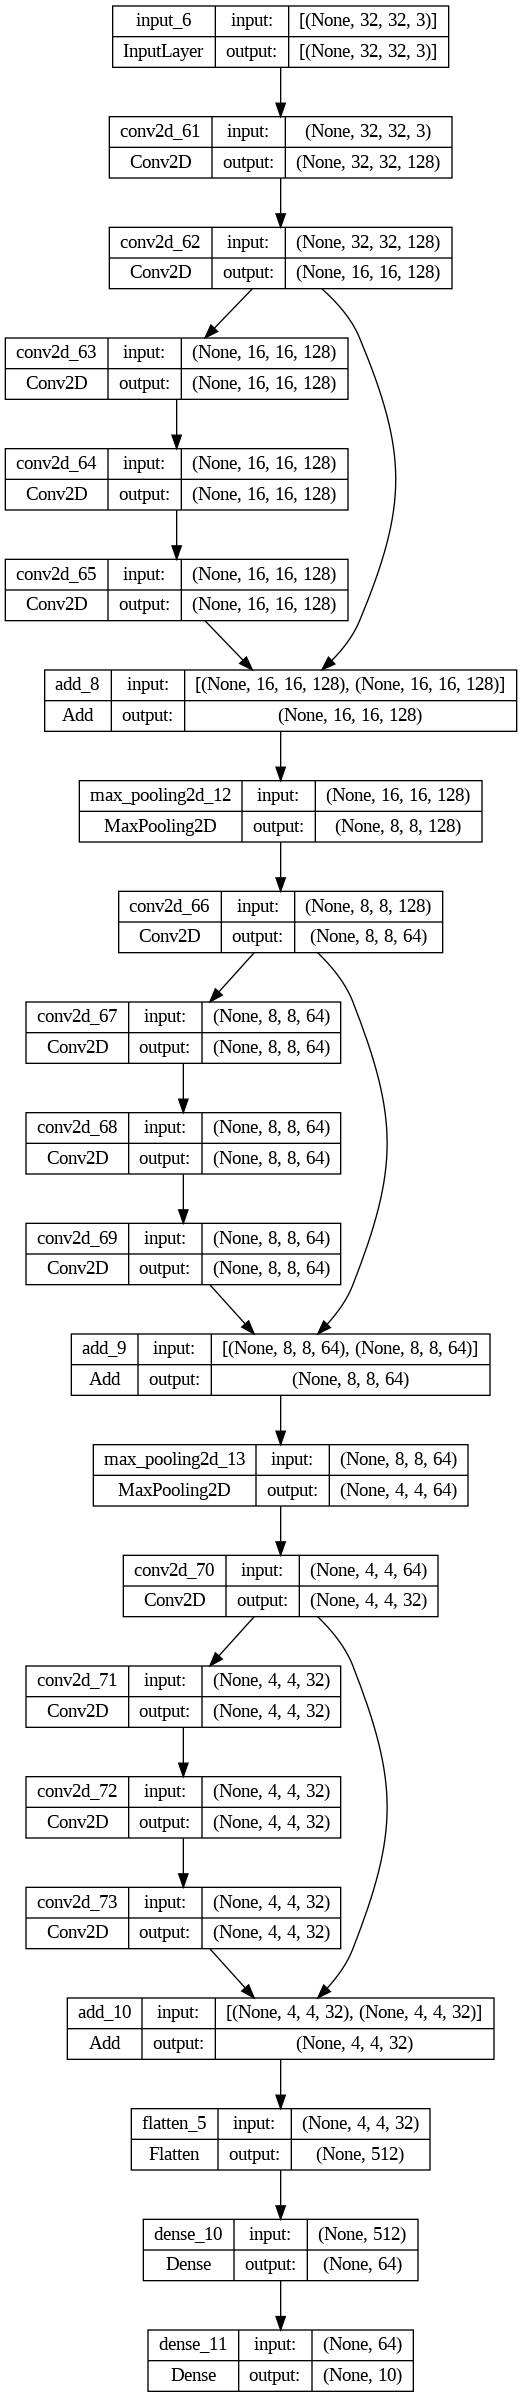

In [42]:
from keras.utils import plot_model
plot_model(model_cnn_skip_3b, show_shapes=True)

In [43]:
model_cnn_skip_3b.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_61 (Conv2D)          (None, 32, 32, 128)          1664      ['input_6[0][0]']             
                                                                                                  
 conv2d_62 (Conv2D)          (None, 16, 16, 128)          65664     ['conv2d_61[0][0]']           
                                                                                                  
 conv2d_63 (Conv2D)          (None, 16, 16, 128)          147584    ['conv2d_62[0][0]']           
                                                                                            

In [24]:
model_cnn_skip_3b.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 24s 12ms/step - loss: 1.7046 - accuracy: 0.3953 - val_loss: 1.4311 - val_accuracy: 0.4833
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2381 - accuracy: 0.5552 - val_loss: 1.1021 - val_accuracy: 0.6038
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0585 - accuracy: 0.6241 - val_loss: 1.1444 - val_accuracy: 0.5886
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9481 - accuracy: 0.6636 - val_loss: 0.9854 - val_accuracy: 0.6516
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8661 - accuracy: 0.6944 - val_loss: 0.9069 - val_accuracy: 0.6828
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8038 - accuracy: 0.7171 - val_loss: 0.8729 - val_accuracy: 0.7002
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7553 - accuracy: 0.7320 - val_loss: 0.8707 -

In [25]:
test_loss, test_acc = model_cnn_skip_3b.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.8535 - accuracy: 0.7134 - 2s/epoch - 6ms/step

Test accuracy: 0.7134000062942505


In [26]:
model_cnn_skip_3b.save('cnn_add_3blocks.h5')

# CNN skip concate

In [33]:
from keras.layers import SeparableConv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Flatten, Dense, add,concatenate

In [34]:
def create_block_c(x, n,s):
  x1 = Conv2D(n, (2,2), strides=(s,s), padding='same',activation='relu')(x)
  x2 = Conv2D(n, (3,3), strides=(1,1), padding='same',activation='relu')(x1)
  x3 = Conv2D(n, (2,2), strides=(1,1), padding='same',activation='relu')(x2)
  x4 = Conv2D(n, (3,3), strides=(1,1), padding='same',activation='relu')(x3)

  add1 = concatenate([x4, x1])

  return add1

## 3 blocks

In [35]:
model = Sequential()
input_shape=(32,32,3)
img_input = Input(input_shape)

x = Conv2D(128,(2,2),  strides=(1,1), padding='same', activation='relu')(img_input)
b1 = create_block_c(x, 128,2)
m1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b1)
b2 = create_block_c(m1, 64,1)
m2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b2)
b3 = create_block_c(m2, 32,1)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model_cnn_skip1 = Model(img_input, output)
model_cnn_skip1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

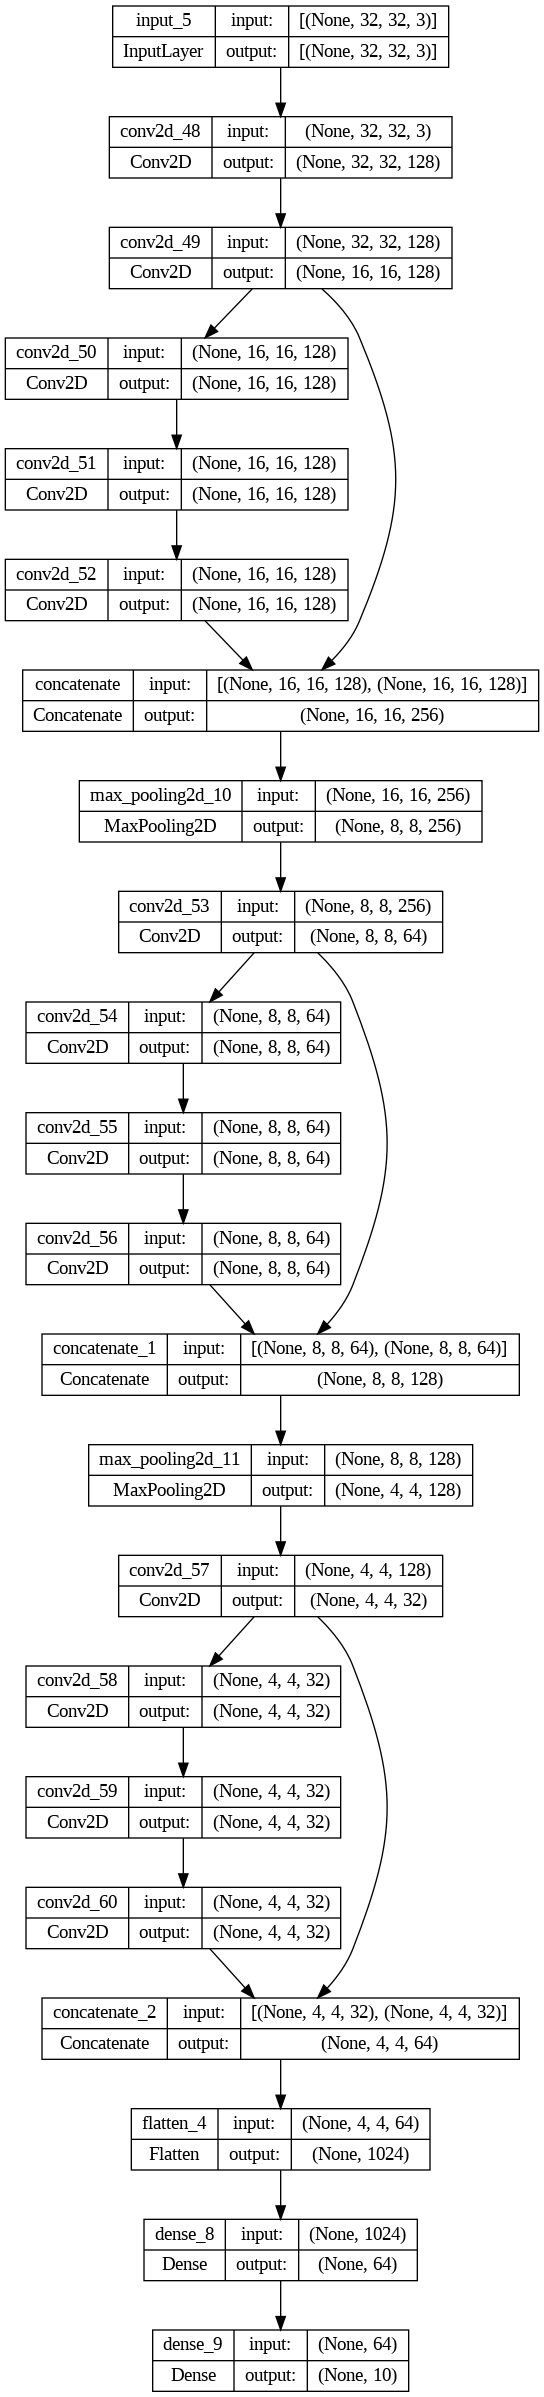

In [36]:
from keras.utils import plot_model
plot_model(model_cnn_skip1, show_shapes=True)

In [37]:
model_cnn_skip1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_48 (Conv2D)          (None, 32, 32, 128)          1664      ['input_5[0][0]']             
                                                                                                  
 conv2d_49 (Conv2D)          (None, 16, 16, 128)          65664     ['conv2d_48[0][0]']           
                                                                                                  
 conv2d_50 (Conv2D)          (None, 16, 16, 128)          147584    ['conv2d_49[0][0]']           
                                                                                            

In [38]:
model_cnn_skip1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 28s 14ms/step - loss: 1.6137 - accuracy: 0.4175 - val_loss: 1.3274 - val_accuracy: 0.5175
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1372 - accuracy: 0.5949 - val_loss: 1.0301 - val_accuracy: 0.6375
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9582 - accuracy: 0.6628 - val_loss: 0.8827 - val_accuracy: 0.6981
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8536 - accuracy: 0.6999 - val_loss: 0.9188 - val_accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7770 - accuracy: 0.7264 - val_loss: 0.9132 - val_accuracy: 0.6895
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7180 - accuracy: 0.7474 - val_loss: 0.8580 - val_accuracy: 0.7155
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6752 - accuracy: 0.7634 - val_loss: 0.8390 -

In [39]:
test_loss, test_acc = model_cnn_skip1.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8544 - accuracy: 0.7177 - 1s/epoch - 4ms/step

Test accuracy: 0.7177000045776367


In [40]:
model_cnn_skip1.save('cnn_concate_3blocks.h5')

# Custom data generator



## Defining custom data generator function in keras

In [44]:
from keras.utils import Sequence
import numpy as np

class CustomDataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]


        return np.array(batch_x), np.array(batch_y)


## Using custom data generator with cnn skip connect 3 block

In [45]:
batch_size = 32

train_generator = CustomDataGenerator(x_train, y_train, batch_size)
model_cnn_skip_3b.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train)//batch_size)



Epoch 1/10


<ipython-input-45-eb086c5ad15d>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_cnn_skip_3b.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train)//batch_size)


1562/1562 [==============================] - 26s 14ms/step - loss: 1.7522 - accuracy: 0.3897
Epoch 2/10
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2410 - accuracy: 0.5516
Epoch 3/10
1562/1562 [==============================] - 22s 14ms/step - loss: 1.0529 - accuracy: 0.6267
Epoch 4/10
1562/1562 [==============================] - 22s 14ms/step - loss: 0.9316 - accuracy: 0.6720
Epoch 5/10
1562/1562 [==============================] - 18s 12ms/step - loss: 0.8522 - accuracy: 0.6982
Epoch 6/10
1562/1562 [==============================] - 18s 12ms/step - loss: 0.7889 - accuracy: 0.7215
Epoch 7/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.7342 - accuracy: 0.7422
Epoch 8/10
1562/1562 [==============================] - 17s 11ms/step - loss: 0.6927 - accuracy: 0.7569
Epoch 9/10
1562/1562 [==============================] - 18s 11ms/step - loss: 0.6518 - accuracy: 0.7708
Epoch 10/10
1562/1562 [==============================] - 18s 12ms/step - lo

In [46]:
test_loss, test_acc = model_cnn_skip_3b.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.8203 - accuracy: 0.7214
Test Accuracy: 0.7214000225067139


In [47]:
model_cnn_skip_3b.save('cnn_add_3blocks_customgenerator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using custom data generator with cnn skip connect using concate 3 block

In [48]:
batch_size = 32

train_generator = CustomDataGenerator(x_train, y_train, batch_size)
model_cnn_skip1.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train)//batch_size)




Epoch 1/10


<ipython-input-48-cafbfef76b36>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_cnn_skip1.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train)//batch_size)


1562/1562 [==============================] - 22s 14ms/step - loss: 0.5546 - accuracy: 0.8065
Epoch 2/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.5327 - accuracy: 0.8146
Epoch 3/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.5161 - accuracy: 0.8205
Epoch 4/10
1562/1562 [==============================] - 18s 12ms/step - loss: 0.4978 - accuracy: 0.8259
Epoch 5/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4979 - accuracy: 0.8276
Epoch 6/10
1562/1562 [==============================] - 18s 12ms/step - loss: 0.4728 - accuracy: 0.8350
Epoch 7/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4711 - accuracy: 0.8359
Epoch 8/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4463 - accuracy: 0.8446
Epoch 9/10
1562/1562 [==============================] - 19s 12ms/step - loss: 0.4437 - accuracy: 0.8447
Epoch 10/10
1562/1562 [==============================] - 20s 13ms/step - lo

In [49]:
test_loss, test_acc = model_cnn_skip1.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.9309 - accuracy: 0.7315
Test Accuracy: 0.7315000295639038


In [50]:
model_cnn_skip_3b.save('cnn_concate_3blocks_customgenerator.h5')

# Dummy

## 5 blocks

In [ ]:
model = Sequential()
input_shape=(32,32,3)
img_input = Input(input_shape)

x = Conv2D(128,(2,2),  strides=(1,1), padding='same', activation='relu')(img_input)
b1 = create_block(x, 128,2)
m1 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b1)
b2 = create_block(m1, 64,1)
m2 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b2)
b3 = create_block(m2, 32,1)
m3 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b3)
b4 = create_block(m3, 64,1)
m4 = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(b4)
b5 = create_block(m4, 32,1)

output= Flatten()(b5)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model_cnn_skip1 = Model(img_input, output)
model_cnn_skip1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

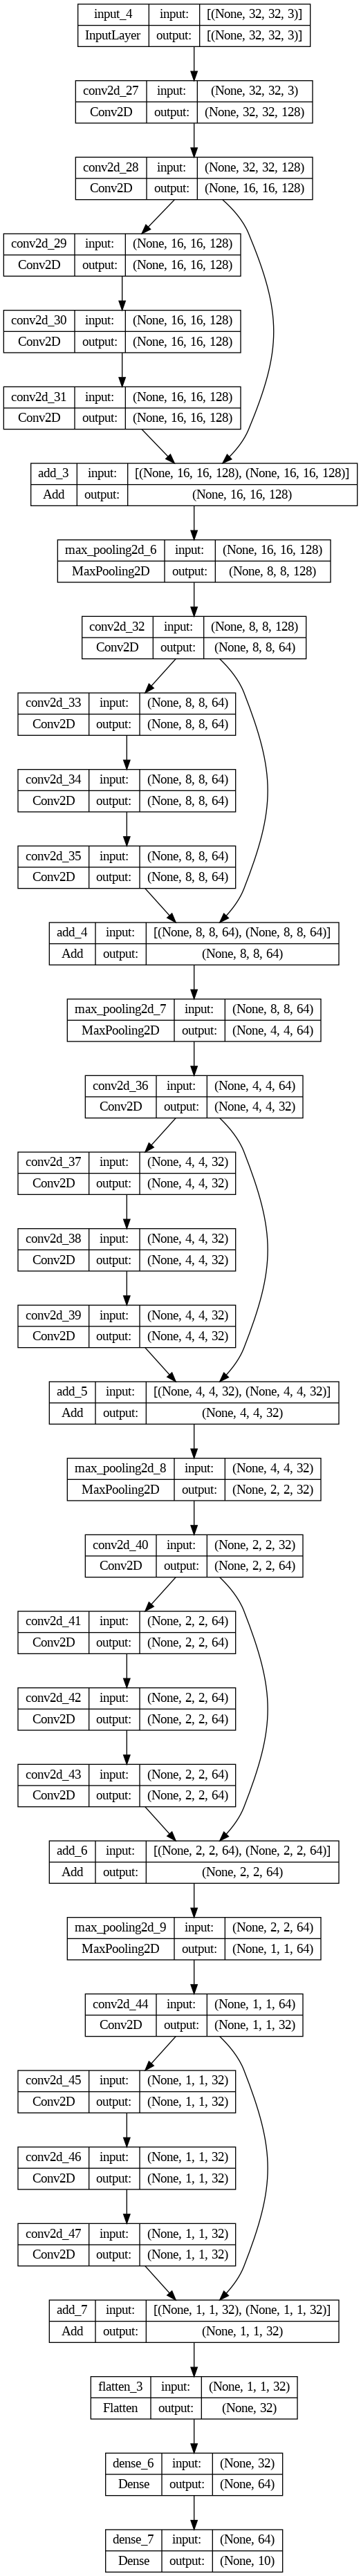

In [ ]:
from keras.utils import plot_model
plot_model(model_cnn_skip1, show_shapes=True)

In [ ]:
model_cnn_skip1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 32, 32, 128)          1664      ['input_4[0][0]']             
                                                                                                  
 conv2d_28 (Conv2D)          (None, 16, 16, 128)          65664     ['conv2d_27[0][0]']           
                                                                                                  
 conv2d_29 (Conv2D)          (None, 16, 16, 128)          147584    ['conv2d_28[0][0]']           
                                                                                            

In [ ]:
model_cnn_skip1.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 30s 15ms/step - loss: 1.7678 - accuracy: 0.3326 - val_loss: 1.4216 - val_accuracy: 0.4744
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3181 - accuracy: 0.5176 - val_loss: 1.2150 - val_accuracy: 0.5669
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1345 - accuracy: 0.5915 - val_loss: 1.1316 - val_accuracy: 0.6003
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0191 - accuracy: 0.6380 - val_loss: 1.0236 - val_accuracy: 0.6416
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9322 - accuracy: 0.6693 - val_loss: 0.9678 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8579 - accuracy: 0.6967 - val_loss: 0.9148 - val_accuracy: 0.6874
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8043 - accuracy: 0.7162 - val_loss: 0.9178 -

In [ ]:
test_loss, test_acc = model_cnn_skip1.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8633 - accuracy: 0.7229 - 1s/epoch - 4ms/step

Test accuracy: 0.7228999733924866


In [ ]:
model_cnn_skip1.save('cnn_add_5blocks.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
